In [1]:
# Data Cleaning

In [2]:
# Importing Dependencies and Loading Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
df = pd.read_csv('dataset_invade.csv')

In [4]:
# Checking for Missing Values

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 duration                  0
protocol_type             0
service                   0
flag                      0
src_bytes                 0
dst_bytes                 0
land                      0
wrong_fragment            0
urgent                    0
hot                       0
logged_in                 0
num_compromised           0
count                     0
srv_count                 0
serror_rate               0
rerror_rate               0
same_srv_rate             0
diff_srv_rate             0
srv_diff_host_rate        0
dst_host_count            0
dst_host_srv_count        0
dst_host_same_srv_rate    0
dst_host_diff_srv_rate    0
attack                    0
dtype: int64


In [6]:
# Detecting and Handling Duplicate Rows

In [7]:
# Display the initial number of rows and the distribution of the 'attack' column
print("Before dropping duplicates:")
print(f"Initial dataset shape: {df.shape}")
print(f"Initial attack distribution:\n{df['attack'].value_counts()}")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# If duplicates exist, drop them
if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print("\nDuplicate rows dropped.")

# Display the dataset shape and the distribution of 'attack' column after dropping duplicates
print("\nAfter dropping duplicates:")
print(f"Updated dataset shape: {df.shape}")
print(f"Updated attack distribution:\n{df['attack'].value_counts()}")

Before dropping duplicates:
Initial dataset shape: (148517, 24)
Initial attack distribution:
attack
No     77054
Yes    71463
Name: count, dtype: int64

Number of duplicate rows: 4757

Duplicate rows dropped.

After dropping duplicates:
Updated dataset shape: (143760, 24)
Updated attack distribution:
attack
No     75540
Yes    68220
Name: count, dtype: int64


In [8]:
# Validating Data Types

In [9]:
# Validate Data Types and Check for Anomalies
def validate_data_types(data):
    anomalies = {}
    for column in df.columns:
        column_dtype = df[column].dtype
        print(f"Column '{column}' has type {column_dtype}")
        
        # Validate categorical data
        if column_dtype == 'category' or isinstance(column_dtype, pd.CategoricalDtype):
            unique_values = df[column].unique()
            print(f" -> Contains {len(unique_values)} unique categorical values: {unique_values}")
        
        # Validate object types
        elif column_dtype == object:
            unique_values = df[column].unique()
            print(f" -> Contains {len(unique_values)} unique object values. Sample: {unique_values[:5]}")
            
        # Validate numeric data
        else:
            min_value = df[column].min()
            max_value = df[column].max()
            print(f" -> Numeric range: {min_value} to {max_value}")
            
            # Check for unexpected negative values
            if (df[column] < 0).any():
                anomalies[column] = "Contains unexpected negative values"

    if anomalies:
        print("\nAnomalies detected:")
        for column, issue in anomalies.items():
            print(f" - {column}: {issue}")
    else:
        print("\nAll columns are consistent and contain no anomalies.")

validate_data_types(df)

Column 'duration' has type int64
 -> Numeric range: 0 to 57715
Column 'protocol_type' has type object
 -> Contains 3 unique object values. Sample: ['tcp' 'udp' 'icmp']
Column 'service' has type object
 -> Contains 70 unique object values. Sample: ['ftp_data' 'other' 'private' 'http' 'remote_job']
Column 'flag' has type object
 -> Contains 11 unique object values. Sample: ['SF' 'S0' 'REJ' 'RSTR' 'SH']
Column 'src_bytes' has type int64
 -> Numeric range: 0 to 1379963888
Column 'dst_bytes' has type int64
 -> Numeric range: 0 to 1309937401
Column 'land' has type int64
 -> Numeric range: 0 to 1
Column 'wrong_fragment' has type int64
 -> Numeric range: 0 to 3
Column 'urgent' has type int64
 -> Numeric range: 0 to 3
Column 'hot' has type int64
 -> Numeric range: 0 to 101
Column 'logged_in' has type int64
 -> Numeric range: 0 to 1
Column 'num_compromised' has type int64
 -> Numeric range: 0 to 7479
Column 'count' has type int64
 -> Numeric range: 0 to 511
Column 'srv_count' has type int64
 -> 

In [10]:
# Ensuring Consistency in Categorical Data

In [11]:
# Categorical columns to check
categorical_cols = ['protocol_type', 'service', 'flag', 'attack']

for col in categorical_cols:
    if col in df.columns:
        unique_values = df[col].unique()
        print(f"{col} unique values:\n", unique_values)

        # Convert text data to lowercase and get rid of spaces
        if df[col].dtype == object:
            df[col] = df[col].str.lower().str.strip()

        # Check for inconsistencies
        if len(set(df[col])) != len(unique_values):
            print(f"Updated {col} unique values after cleaning:\n", df[col].unique())

protocol_type unique values:
 ['tcp' 'udp' 'icmp']
service unique values:
 ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
flag unique values:
 ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
attack unique values:
 ['No' 'Yes']


In [12]:
# Performing Encoding

In [13]:
# Encode attack column (target variable) for model evaluation
df['attack'] = df['attack'].map({'no': 0, 'yes': 1})

In [14]:
# Saving the Cleaned Dataset

In [15]:
df.to_csv('cleaned_dataset.csv', index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")

Cleaned dataset saved as 'cleaned_dataset.csv'


In [16]:
# Exploratory Data Analysis(EDA)

In [17]:
# Importing necessary libraries for visualization and loading new cleaned dataset

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('cleaned_dataset.csv')

In [19]:
# Measure of central tendency and spread for numerical columns
print("\nUnivariate Non-Graphical Analysis:")
numerical_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 
                     'num_compromised', 'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 
                     'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
                     'dst_host_same_srv_rate', 'dst_host_diff_srv_rate']

print("Summary Statistics:\n", df[numerical_columns].describe())


Univariate Non-Graphical Analysis:
Summary Statistics:
             duration     src_bytes     dst_bytes           land  \
count  143760.000000  1.437600e+05  1.437600e+05  143760.000000   
mean      285.765762  4.140671e+04  1.763605e+04       0.000167   
std      2500.166326  5.498380e+06  3.764300e+06       0.012920   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.500000e+01  0.000000e+00       0.000000   
75%         0.000000  2.800000e+02  5.990000e+02       0.000000   
max     57715.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_compromised  \
count   143760.000000  143760.000000  143760.000000    143760.000000   
mean         0.020305       0.000209       0.191597         0.261519   
std          0.240307       0.019736       2.044314        22.596131   
min          0.000000       0.000000       0.000000

In [20]:
# -----------------------------
# 🔹 1. Univariate Non-Graphical Analysis
# -----------------------------

# Detect Outliers using IQR
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("\nOutlier Count:\n", outliers)


Outlier Count:
 duration                  13427
src_bytes                 15799
dst_bytes                 25245
land                         24
wrong_fragment             1105
urgent                       19
hot                        3383
num_compromised            1370
count                      3359
srv_count                 13626
serror_rate                   0
rerror_rate               19561
same_srv_rate                 0
diff_srv_rate              8738
srv_diff_host_rate        32795
dst_host_count                0
dst_host_srv_count            0
dst_host_same_srv_rate        0
dst_host_diff_srv_rate    11134
dtype: int64


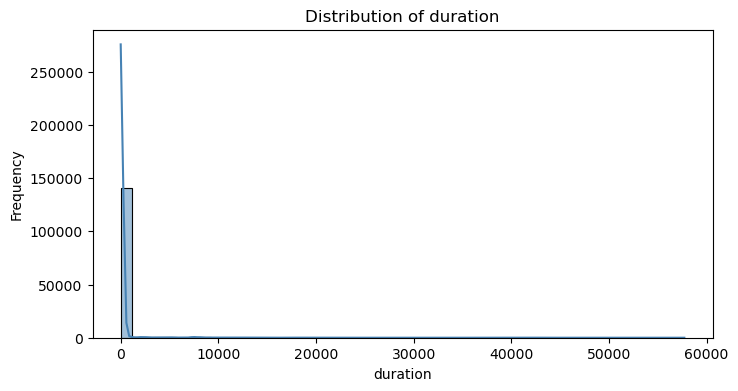

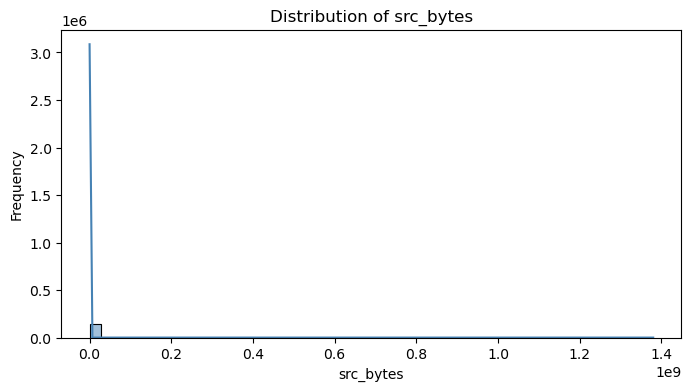

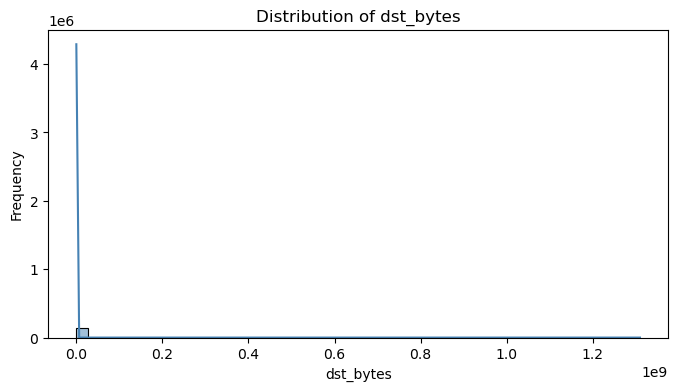

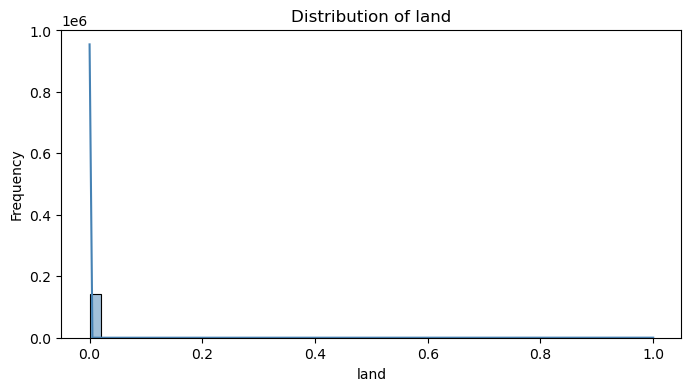

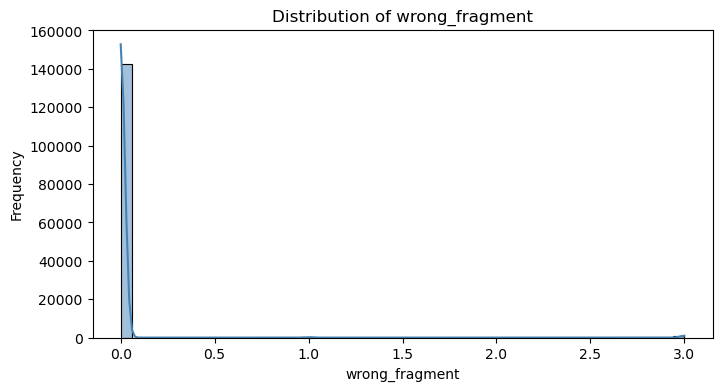

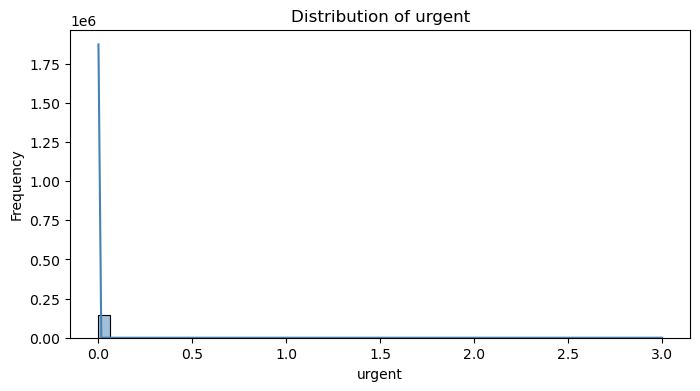

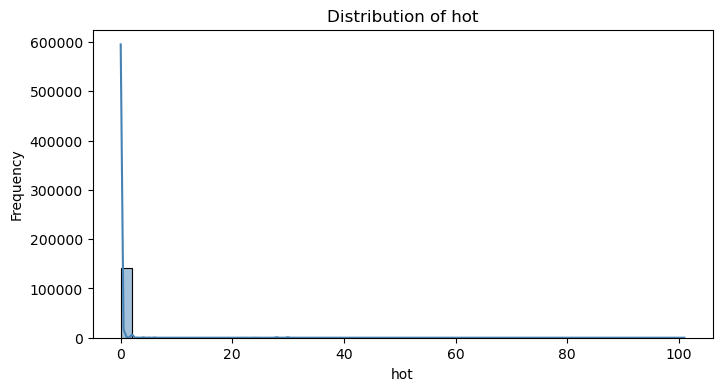

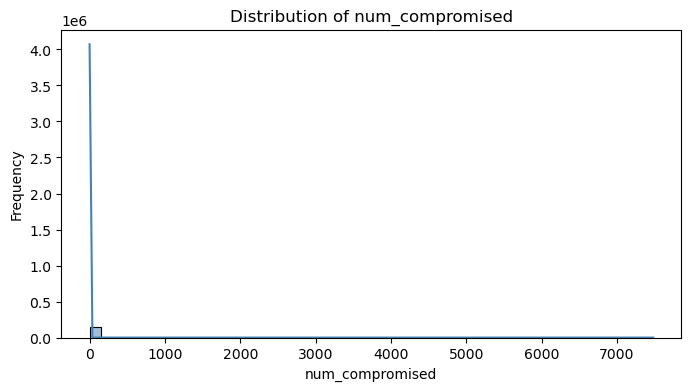

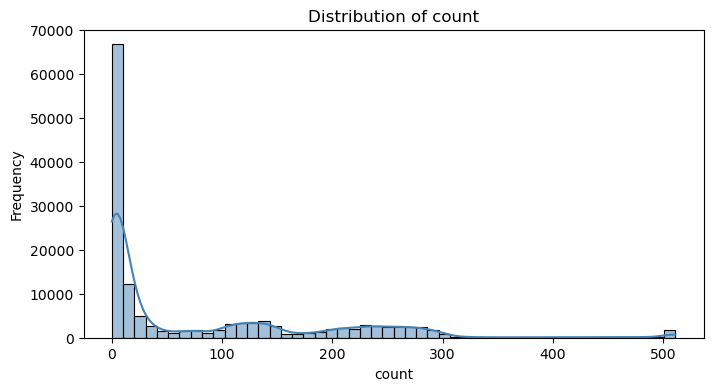

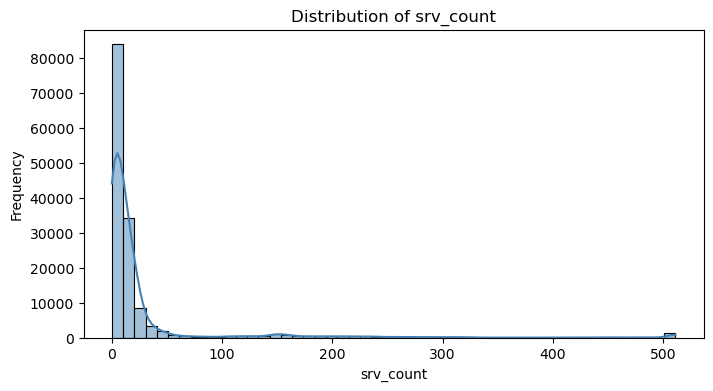

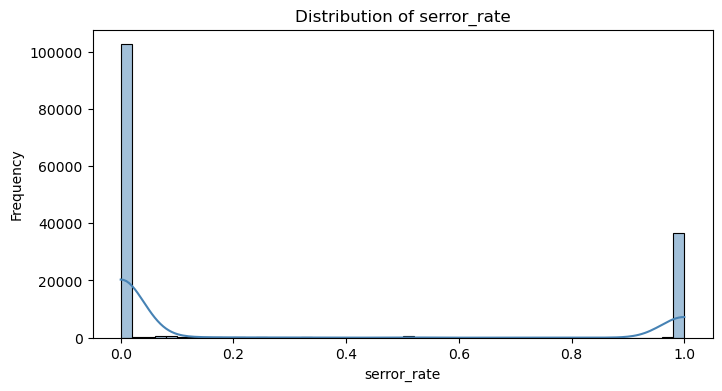

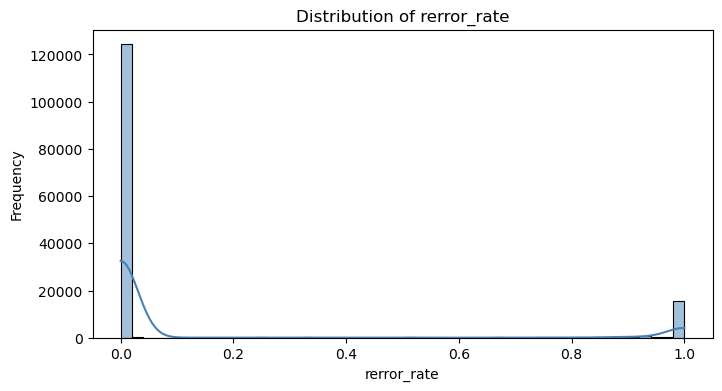

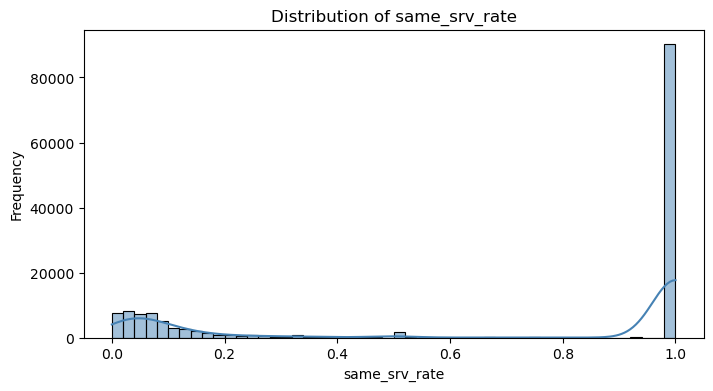

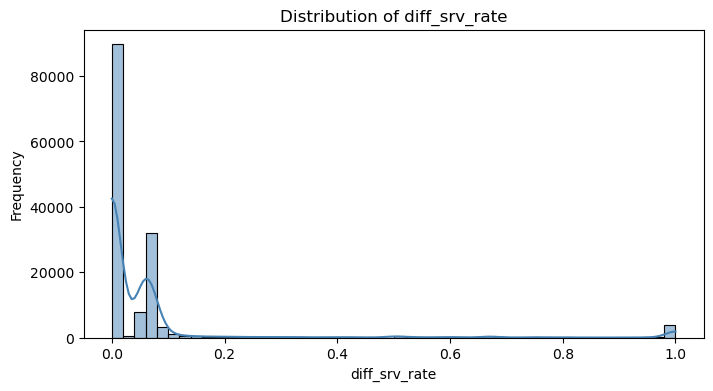

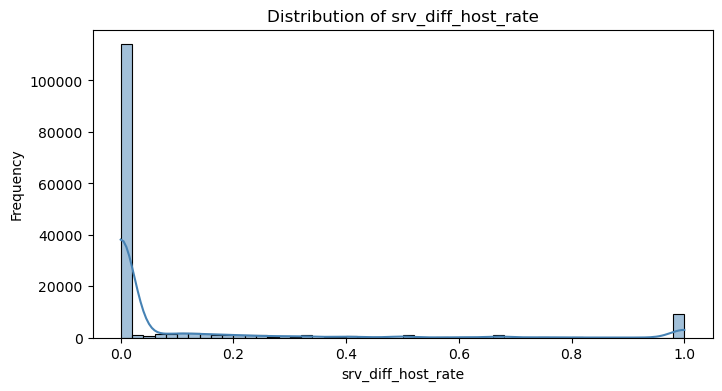

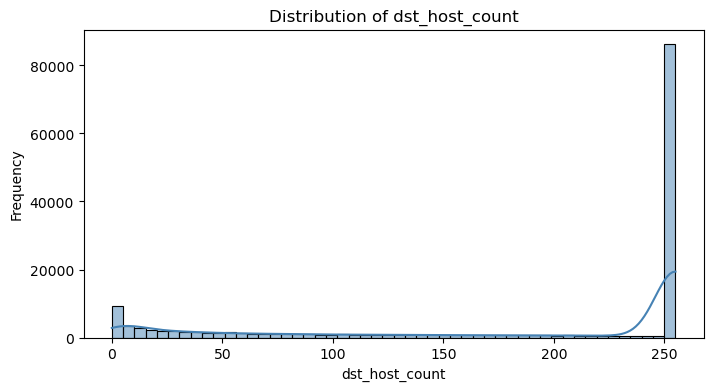

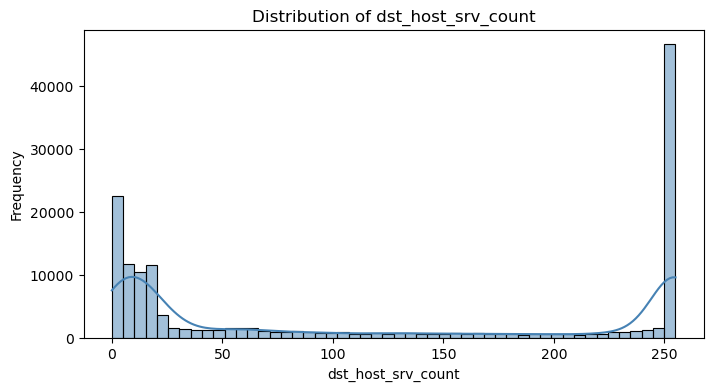

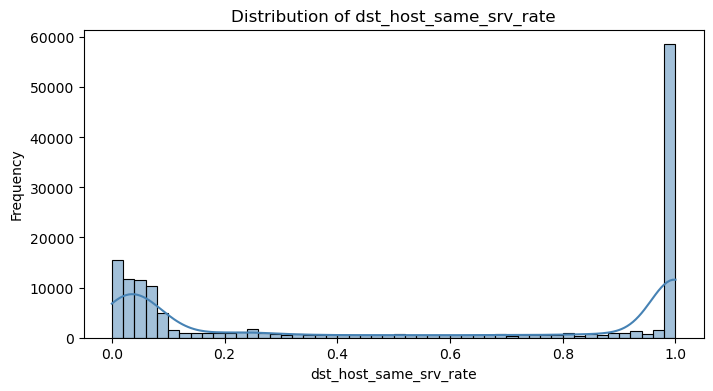

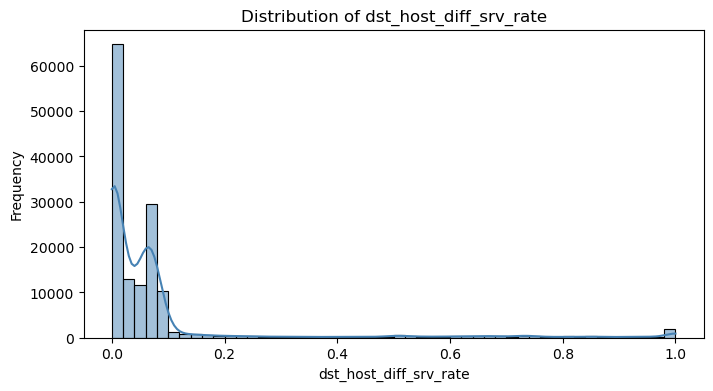

In [21]:
# -----------------------------
# 🔹 2. Univariate Graphical Analysis
# -----------------------------

# Histograms & KDE Plots
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=50, kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [22]:
# -----------------------------
# 🔹 3. Multivariate Non-Graphical Analysis
# -----------------------------

# Correlation & Covariance
print("\nCorrelation Matrix:\n", df[numerical_columns].corr())
print("\nCovariance Matrix:\n", df[numerical_columns].cov())


Correlation Matrix:
                         duration  src_bytes  dst_bytes      land  \
duration                1.000000   0.068959   0.034052 -0.001477   
src_bytes               0.068959   1.000000   0.000211 -0.000097   
dst_bytes               0.034052   0.000211   1.000000 -0.000061   
land                   -0.001477  -0.000097  -0.000061  1.000000   
wrong_fragment         -0.009658  -0.000634  -0.000396 -0.001092   
urgent                  0.002389  -0.000076   0.000177 -0.000137   
hot                     0.000546   0.000322  -0.000306 -0.001211   
num_compromised         0.043982  -0.000082   0.001251 -0.000150   
count                  -0.081000  -0.004951  -0.003345 -0.008925   
srv_count              -0.040215  -0.002679  -0.001657 -0.004586   
serror_rate            -0.066722  -0.002898  -0.002749  0.021010   
rerror_rate             0.177138   0.012454   0.010096 -0.003898   
same_srv_rate           0.076559   0.003718   0.003528  0.007707   
diff_srv_rate          -0.

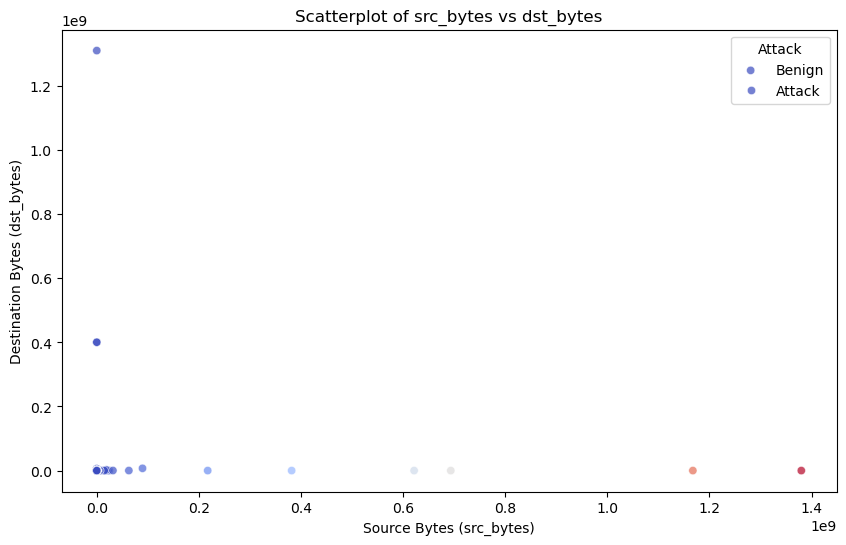

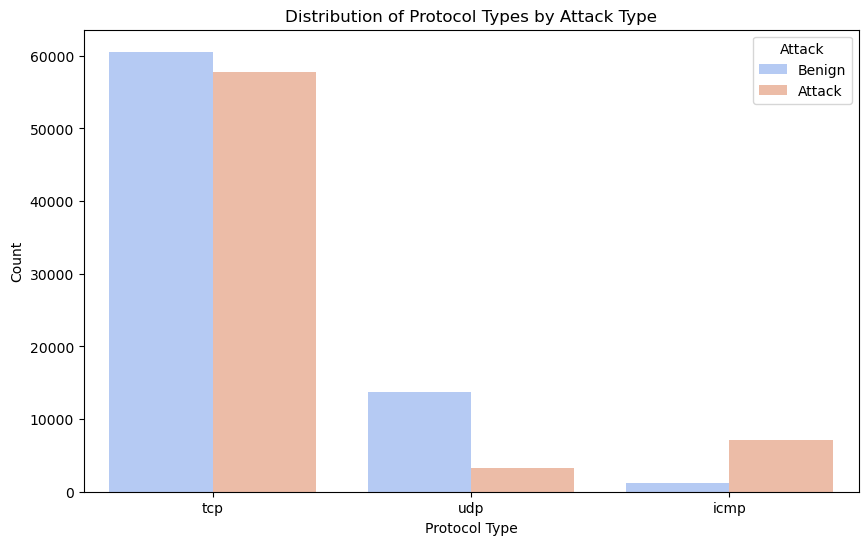

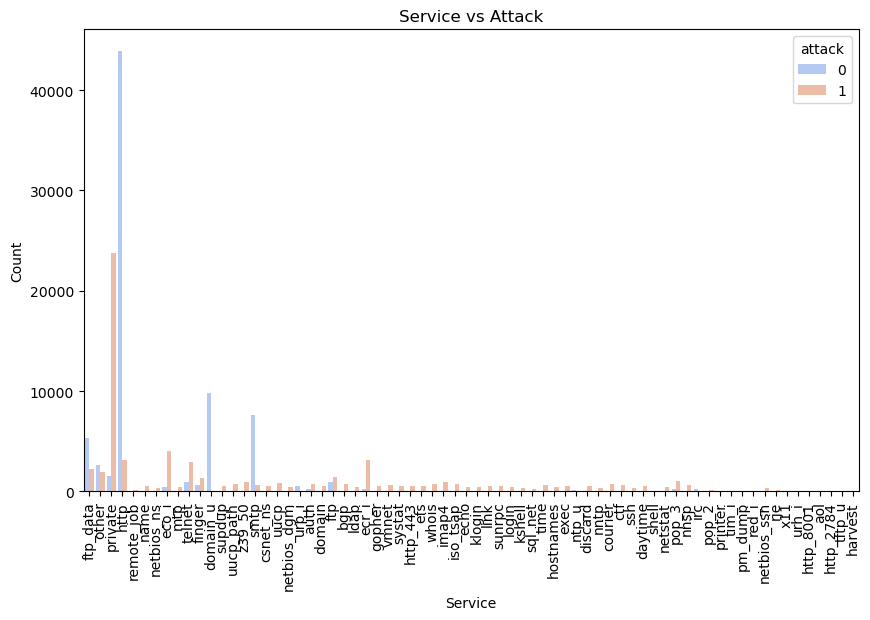

In [23]:
# -----------------------------
# 🔹 4. Multivariate Graphical Analysis
# -----------------------------

# Scatterplot for src_bytes vs dst_bytes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='src_bytes', y='dst_bytes', hue='src_bytes', palette='coolwarm', alpha=0.7)
plt.title('Scatterplot of src_bytes vs dst_bytes')
plt.xlabel('Source Bytes (src_bytes)')
plt.ylabel('Destination Bytes (dst_bytes)')
plt.legend(title='Attack', labels=['Benign', 'Attack'])
plt.show()

# Bar plot for protocol_type vs attack
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='protocol_type', hue='attack', palette='coolwarm')
plt.title('Distribution of Protocol Types by Attack Type')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.legend(title='Attack', labels=['Benign', 'Attack'])
plt.show()

# Bar plot for service vs attack
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='service', hue='attack', palette='coolwarm')
plt.title('Service vs Attack')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [24]:
#Feature Engineering

In [25]:
#Feature Extraction

In [26]:
from sklearn.cluster import KMeans

# Select only numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42) # Create 3 clusters
df['cluster'] = kmeans.fit_predict(df[numerical_cols])

# Print cluster distribution
print("Cluster assignments:\n", df['cluster'].value_counts())

Cluster assignments:
 cluster
0    143754
2         3
1         2
3         1
Name: count, dtype: int64


In [27]:
#Feature Selection

In [28]:
from sklearn.feature_selection import VarianceThreshold

# Variance Thresholding (remove features with low variance)
selector = VarianceThreshold(threshold=0.1)  # Set a threshold for variance
selected_features = selector.fit_transform(df[numerical_cols])
print("Number of features before variance thresholding:", len(numerical_cols))
print("Number of features after variance thresholding:", selected_features.shape[1])

# Correlation Analysis (remove highly correlated features)
correlation_matrix = df[numerical_cols].corr()
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Threshold for high correlation
            highly_correlated_features.add(correlation_matrix.columns[i])
print("Highly correlated features to remove:", highly_correlated_features)

Number of features before variance thresholding: 21
Number of features after variance thresholding: 15
Highly correlated features to remove: {'dst_host_same_srv_rate'}


In [29]:
# Remove one of the highly correlated features
df.drop(columns=['same_srv_rate'], inplace=True)  # Remove 'same_srv_rate'
print("Columns after removing highly correlated features:", df.columns)

Columns after removing highly correlated features: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'logged_in',
       'num_compromised', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'attack', 'cluster'],
      dtype='object')


In [30]:
# Check the distribution of the remaining features
print("Summary statistics of remaining features:\n", df.describe())

# Analyse the relationship with the target variable
if 'target_column' in df.columns:
    for col in df.columns:
        if col != 'target_column':
            print(f"Correlation between {col} and target_column:", df[col].corr(df['target_column']))

Summary statistics of remaining features:
             duration     src_bytes     dst_bytes           land  \
count  143760.000000  1.437600e+05  1.437600e+05  143760.000000   
mean      285.765762  4.140671e+04  1.763605e+04       0.000167   
std      2500.166326  5.498380e+06  3.764300e+06       0.012920   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.500000e+01  0.000000e+00       0.000000   
75%         0.000000  2.800000e+02  5.990000e+02       0.000000   
max     57715.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot      logged_in  \
count   143760.000000  143760.000000  143760.000000  143760.000000   
mean         0.020305       0.000209       0.191597       0.412583   
std          0.240307       0.019736       2.044314       0.492301   
min          0.000000       0.000000       0.000000       0.000000   
25%

In [31]:
#Feature Construction

In [32]:
# Destination Host Activity

In [33]:
df['dst_host_activity'] = df['dst_host_count'] / (df['duration'] + 1e-7)  # Add small constant to avoid division by zero
print("New feature 'dst_host_activity':\n", df['dst_host_activity'].describe())

New feature 'dst_host_activity':
 count    1.437600e+05
mean     1.681277e+09
std      1.080483e+09
min      0.000000e+00
25%      4.000000e+08
50%      2.550000e+09
75%      2.550000e+09
max      2.550000e+09
Name: dst_host_activity, dtype: float64


In [34]:
# Connection Density

In [35]:
df['conn_density'] = df['count'] / (df['srv_count'] + 1)  # Avoid division by zero
print("Connection Density Summary:\n", df['conn_density'].describe())
print("Sample Connection Density Values:\n", df[['count', 'srv_count', 'conn_density']].head())

Connection Density Summary:
 count    143760.000000
mean         10.460869
std          27.564189
min           0.000000
25%           0.500000
50%           0.909091
75%           9.250000
max         255.500000
Name: conn_density, dtype: float64
Sample Connection Density Values:
    count  srv_count  conn_density
0      2          2      0.666667
1     13          1      6.500000
2    123          6     17.571429
3      5          5      0.833333
4     30         32      0.909091


In [36]:
# Error Rate Difference

In [37]:
df['error_rate_diff'] = abs(df['serror_rate'] - df['rerror_rate'])
print("Error Rate Difference Summary:\n", df['error_rate_diff'].describe())
print("Sample Error Rate Differences:\n", df[['serror_rate', 'rerror_rate', 'error_rate_diff']].head())

Error Rate Difference Summary:
 count    143760.000000
mean          0.386193
std           0.480328
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: error_rate_diff, dtype: float64
Sample Error Rate Differences:
    serror_rate  rerror_rate  error_rate_diff
0          0.0          0.0              0.0
1          0.0          0.0              0.0
2          1.0          0.0              1.0
3          0.2          0.0              0.2
4          0.0          0.0              0.0


In [38]:
# Service Interaction

In [39]:
df['service_interaction'] = df['srv_count'] / (df['dst_host_srv_count'] + 1)  # Avoid division by zero
print("Service Interaction Score Summary:\n", df['service_interaction'].describe())
print("Sample Service Interaction Scores:\n", df[['srv_count', 'dst_host_srv_count', 'service_interaction']].head())

Service Interaction Score Summary:
 count    143760.000000
mean          0.579692
std           2.190243
min           0.000000
25%           0.031250
50%           0.176471
75%           0.835938
max         255.500000
Name: service_interaction, dtype: float64
Sample Service Interaction Scores:
    srv_count  dst_host_srv_count  service_interaction
0          2                  25             0.076923
1          1                   1             0.500000
2          6                  26             0.222222
3          5                 255             0.019531
4         32                 255             0.125000


In [40]:
# Feature Learning

In [41]:
# Importing Relevant Libraries

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = df[['dst_host_activity', 'conn_density', 'error_rate_diff', 'service_interaction']]

# Standardising the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [43]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_features)

# Assign the cluster labels to the original data
df['cluster'] = kmeans.labels_

# Cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Cluster size distribution
print("Cluster Sizes:")
print(df['cluster'].value_counts())

Cluster Centers:
[[ 0.68674248  5.24705582  1.04990723 -0.05141541]
 [-1.28752618 -0.35224404 -0.59528873 -0.18194919]
 [ 0.65897279 -0.33513137 -0.78751273 -0.07482463]
 [ 0.72388604  0.29737702  1.26010308  0.26328787]]
Cluster Sizes:
cluster
1    50302
3    47516
2    42541
0     3401
Name: count, dtype: int64


In [44]:
# Verify the new feature
print("Cluster feature added to dataset:")
print(df[['dst_host_activity', 'conn_density', 'error_rate_diff', 'service_interaction', 'cluster']].head())

# Verify the final dataset
print("Final dataset columns:", df.columns)

Cluster feature added to dataset:
   dst_host_activity  conn_density  error_rate_diff  service_interaction  \
0       1.500000e+09      0.666667              0.0             0.076923   
1       2.550000e+09      6.500000              0.0             0.500000   
2       2.550000e+09     17.571429              1.0             0.222222   
3       3.000000e+08      0.833333              0.2             0.019531   
4       2.550000e+09      0.909091              0.0             0.125000   

   cluster  
0        2  
1        2  
2        3  
3        1  
4        2  
Final dataset columns: Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'logged_in',
       'num_compromised', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'attack', 'cluster', 'dst_host_act

In [45]:
#Predictive Modelling

In [46]:
# Importing Relevant Library

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
# Encode categorical features
categorical_features = ['protocol_type', 'service', 'flag']
label_encoders = {}
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [49]:
# Define features and target variable
X = df.drop(columns=['attack'])
y = df['attack']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [50]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [51]:
# Train Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train, y_train)
log_reg_preds = log_reg_model.predict(X_test)

In [52]:
# Model Evaluation

In [53]:
# Importing Metrics

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,matthews_corrcoef

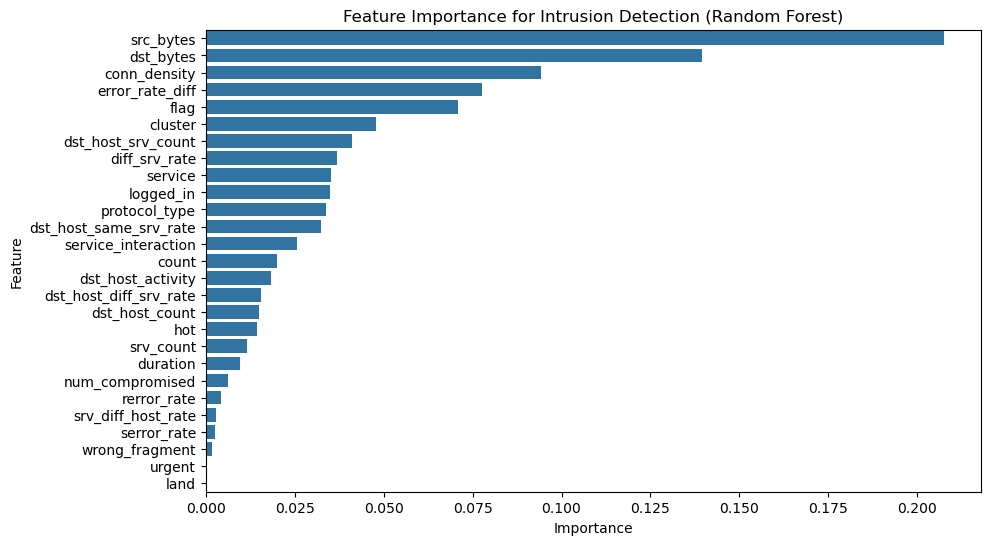

In [55]:
# Feature Importance Analysis
feature_importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Intrusion Detection (Random Forest)')
plt.show()

In [56]:
# Evaluation Function
def evaluate_classification_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("Matthews Correlation Coefficient (MCC):", matthews_corrcoef(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()


Random Forest Performance:
Accuracy: 0.9957915971062883
Precision: 0.9970594721752555
Recall: 0.9940633245382586
F1-score: 0.9955591441259588
Matthews Correlation Coefficient (MCC): 0.9915641414961133

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15108
           1       1.00      0.99      1.00     13644

    accuracy                           1.00     28752
   macro avg       1.00      1.00      1.00     28752
weighted avg       1.00      1.00      1.00     28752


Confusion Matrix:


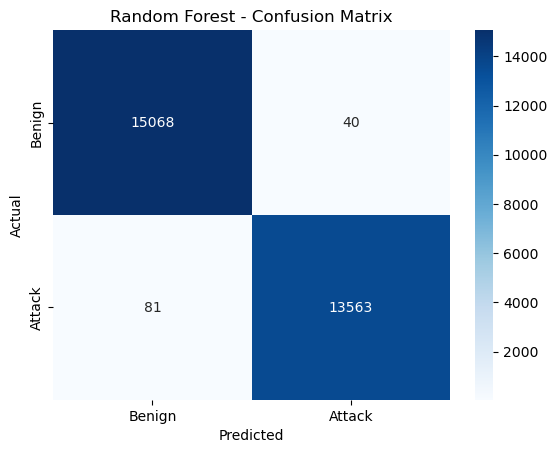


Logistic Regression Performance:
Accuracy: 0.8548622704507512
Precision: 0.8688371368486643
Recall: 0.8175754910583407
F1-score: 0.8424272174602575
Matthews Correlation Coefficient (MCC): 0.7092607303160635

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     15108
           1       0.87      0.82      0.84     13644

    accuracy                           0.85     28752
   macro avg       0.86      0.85      0.85     28752
weighted avg       0.86      0.85      0.85     28752


Confusion Matrix:


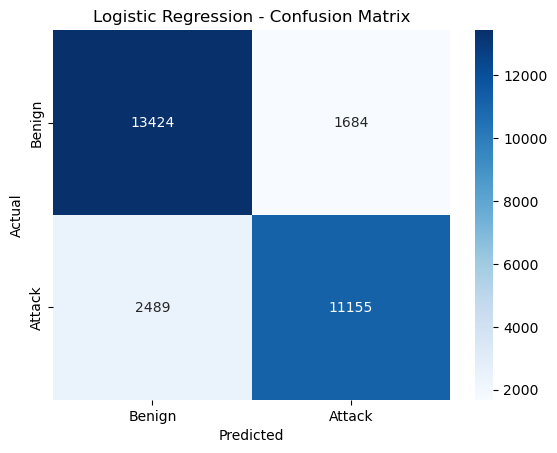

In [57]:
# Evaluate Models - Calling the Functions
evaluate_classification_model(y_test, rf_preds, "Random Forest")
evaluate_classification_model(y_test, log_reg_preds, "Logistic Regression")
